In [1]:
from IPython.display import clear_output

# 1- Downloads for local use (Not needed in Colab)

In [2]:
# Download the required libraries (needed when running outside colab where the environment doesn't come pre-loaded with libraries)

%pip install numpy
%pip install pillow
%pip install matplotlib
%pip install torchvision  # for MNIST dataset

clear_output()

# 2- Imports

In [1]:
import torchvision
import numpy as np

import torch.nn.functional as F

import matplotlib.pyplot as plt

from PIL import Image

#Contents:

1. Implement DCT based image compression in numpy.


You need to know:

1. **numpy** (for impelementation)
2. a little bit of **matplotlib** (for visualization)
3. Pillow (only a little bit)

### 3- Load the dataset
 we will use images from mnist for our img compression

In [2]:
train_dataset = torchvision.datasets.MNIST(root='./data', train= True, download=True) # Download the training dataset
original_imgs = [train_dataset[i][0] for i in range(10)] # Extract the first 10 images from the dataset without their labels

In [3]:
len(original_imgs)

10

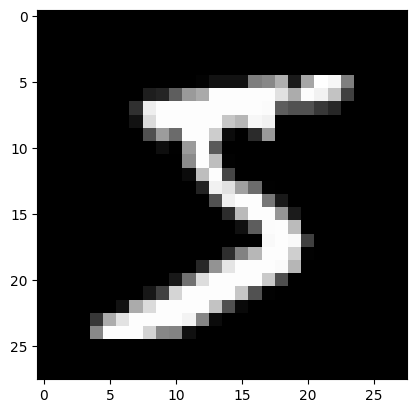

In [4]:
plt.imshow(original_imgs[0], cmap='gray')

### 4- Let's move towards the compression part

In [5]:
def get_greyscale_dct_bases(img, num_bases):
  # Input: An image, that we want to compress (used only to determine its dimensions: height and width)
  # Output: A 2D numpy array of shape (height * width, num_bases^2), where each column represents a flattened DCT basis function

  if isinstance(img, Image.Image):
    img = np.array(img.convert('L'))

  if not isinstance(img, np.ndarray) or len(img.shape) != 2:
    raise ValueError('Image must be greyscale, converted to numpy form')

  nr, nc = np.shape(img)

  xr = np.arange(nr)/nr
  xc = np.arange(nc)/nc

  X1,X2 = np.meshgrid(xr,xc)

  I = np.arange(num_bases)
  J = np.arange(num_bases)

  X1 = X1[:, :, np.newaxis, np.newaxis]
  X2 = X2[:, : ,np.newaxis, np.newaxis]

  I = I[np.newaxis, np.newaxis, : , np.newaxis]
  J = J[np.newaxis, np.newaxis,  np.newaxis,:]

  # Compute the DCT basis functions as the product of cosine terms for the specified frequencies (I, J) and spatial coordinates (X1, X2)
  bases = np.cos(np.pi*I*X1)*np.cos(np.pi*J*X2)
  bases = np.reshape(bases, (-1, bases.shape[2]*bases.shape[3]))

  return bases

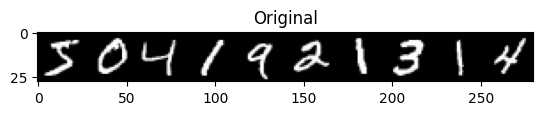

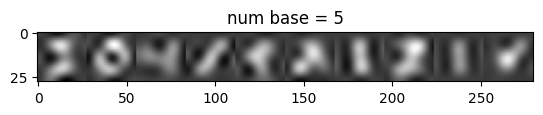

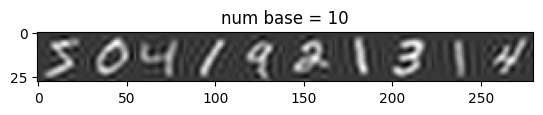

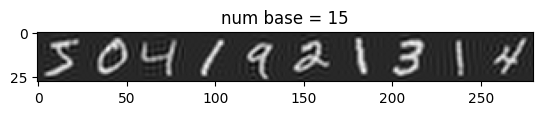

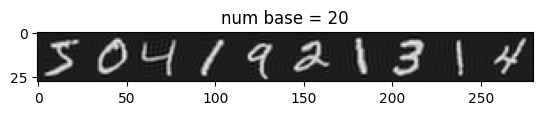

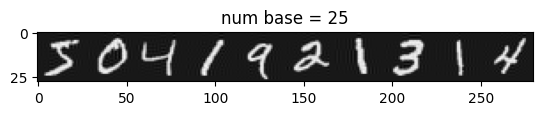

In [6]:
nb_options = [5, 10, 15, 20, 25]  # lets see the effect of making increasing number of bases

big_original = np.concatenate(original_imgs, axis=1) # Concatenate the images side by side, just for easier representation for plotting
plt.title('Original')
plt.imshow(big_original, cmap='gray') # Plot the Original images

for nb in nb_options: # For every number of bases:

  # Generate DCT bases for each image in original_imgs
  bases = [get_greyscale_dct_bases(img, nb) for img in original_imgs] # In our case, all the images have the same dimensions (from MNIST), so the bases will be identical for all images
  compressed_imgs = []

  bases = np.array(bases) # Convert from a normal array to a numpy array

  for base, img in zip(bases, original_imgs):

    w = np.linalg.solve(base.T@base, base.T@ np.reshape(img, (-1,1))) # Calculate the weights (DCT coefficients) using the Closed-form solution for Linear Regression
    compressed_img = base@w # Reconstruct the compressed image using the calculated DCT coefficients
    compressed_img = compressed_img.reshape((img.height, img.width))  # Bring back to shape from flattened img

    compressed_imgs.append(compressed_img)

  big_compressed = np.concatenate(compressed_imgs, axis=1) # Concatenate the images side by side, just for easier representation for plotting

  plt.figure()
  plt.title(f'num base = {nb}')
  plt.imshow(big_compressed, cmap='gray') # Plot the Compressed images
